#  Housing Agency in Boston MA

This is my project for IBM Data Science course.

In [19]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import io
import scipy.stats
import seaborn as sns
import statsmodels.api as sm
import statsmodels
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df=pd.read_csv(boston_url)

Project Tasks:

Task 1: Familiarize yourself with the dataset 

Task 2: (Optional) If you do not already have an instance of Watson Studio, create an IBM Cloud Lite account and provision an instance of Waston Studio.

Task 3: Load the dataset in a Jupyter Notebook using Watson Studio.

Task 4: Generate basic statistics and visualizations for upper management. 

Task 5: Use the appropriate tests to answer the questions provided.

Task 6: Share your Jupyter Notebook.

In [36]:
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,age_group
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0,between 35 and 70 years
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6,70 years and older
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7,between 35 and 70 years
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4,between 35 and 70 years
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2,between 35 and 70 years


In [4]:
#Is there a difference in Median values of houses (MEDV) for 
#each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)
boston_df.loc[(boston_df['AGE']<=35),'age_group']='35 years and younger'
boston_df.loc[(boston_df['AGE']>35)&(boston_df['AGE']<=70),'age_group']='between 35 and 70 years'
boston_df.loc[(boston_df['AGE']>70),'age_group']='70 years and older'

In [5]:
scipy.stats.levene(boston_df[boston_df['age_group']=='35 years and younger']['MEDV'],
                   boston_df[boston_df['age_group']=='between 35 and 70 years']['MEDV'],
                   boston_df[boston_df['age_group']=='70 years and older']['MEDV'],
                   center='mean')

LeveneResult(statistic=2.7806200293748304, pvalue=0.06295337343259205)

In [6]:
lover_35_MEDV = boston_df[boston_df['age_group']=='35 years and younger']['MEDV']
btw35_and_70_MEDV = boston_df[boston_df['age_group']=='between 35 and 70 years']['MEDV']
older_70_MEDV = boston_df[boston_df['age_group']=='70 years and older']['MEDV']

In [7]:
f_statistic, p_value = scipy.stats.f_oneway(lover_35_MEDV,btw35_and_70_MEDV,older_70_MEDV)
print("F_Statistic: {0}, P-Value: {1}".format(f_statistic,p_value))

F_Statistic: 36.40764999196599, P-Value: 1.7105011022702984e-15


NameError: name 'plt' is not defined

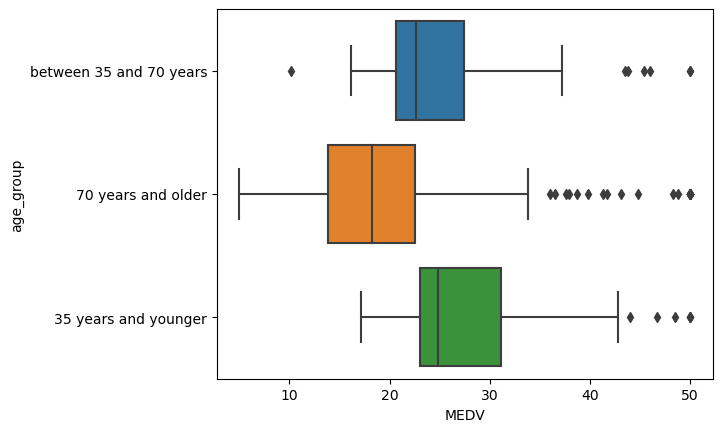

In [8]:
ax = sns.boxplot(x='MEDV',y='age_group',data=boston_df)
plt.show()

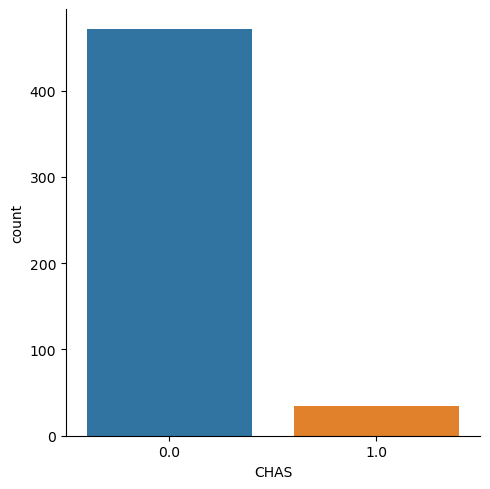

In [9]:
#Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)
ax=sns.catplot(x='CHAS',kind='count',data=boston_df)

In [10]:
scipy.stats.levene(boston_df[boston_df['CHAS']==0]['MEDV'],
                   boston_df[boston_df['CHAS']==1]['MEDV'],center='mean')


LeveneResult(statistic=8.75190489604598, pvalue=0.003238119367639829)

In [11]:
scipy.stats.ttest_ind(boston_df[boston_df['CHAS']==0]['MEDV'],
                   boston_df[boston_df['CHAS']==1]['MEDV'],equal_var=True)

Ttest_indResult(statistic=-3.996437466090509, pvalue=7.390623170519905e-05)

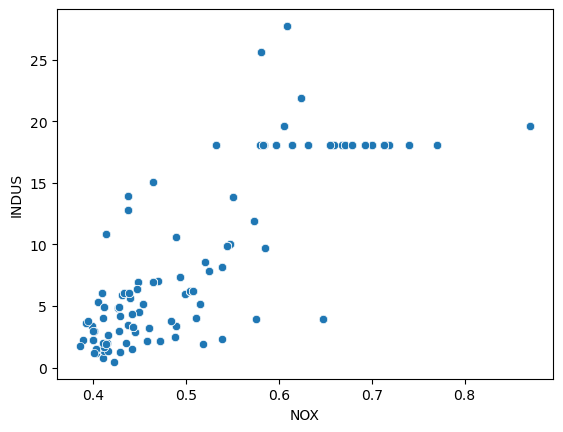

In [12]:
#Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town?
ax = sns.scatterplot(x='NOX', y='INDUS', data=boston_df)

In [13]:
scipy.stats.pearsonr(boston_df['NOX'],boston_df['INDUS'])

PearsonRResult(statistic=0.7636514469209162, pvalue=7.913361061232958e-98)

In [21]:
#What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? 
x = boston_df['DIS']
y=boston_df['MEDV']
x = sm.add_constant(x)
model = sm.OLS(y,x).fit()
prediction = model.predict(x)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Fri, 22 Dec 2023   Prob (F-statistic):           1.21e-08
Time:                        03:54:06   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""